In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1644871288_9775174_cleveland-test.csv to 1644871288_9775174_cleveland-test.csv
Saving 1644871288_9762487_cleveland-train.csv to 1644871288_9762487_cleveland-train.csv


In [3]:
df = pd.read_csv("1644871288_9762487_cleveland-train.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease::category|-1|1
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


In [4]:
df = df.rename(columns = {"heartdisease::category|-1|1": "res"})
df["res"] = df.res.replace(-1,0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,res
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [ ]:
# a = pd.get_dummies(df['cp'], prefix = "cp")
# b = pd.get_dummies(df['thal'], prefix = "thal")
# c = pd.get_dummies(df['slope'], prefix = "slope")
# frames = [df, a, b, c]
# df = pd.concat(frames, axis = 1)
# df = df.drop(columns = ['cp', 'thal', 'slope'])
# df

In [5]:
y = df.res.values
x_data = df.drop(['res'], axis = 1)

In [ ]:
# from sklearn import preprocessing

# x_data_array = x_data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x_data_array)
# x = pd.DataFrame(x_scaled)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
x = scaler.fit_transform(x_data)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print(x_train)

[[ 1.28578818  0.49727024  0.2719794  ... -0.40389312 -1.53034732
  -2.31886526]
 [ 0.72111026  0.72111026  0.72111026 ...  0.72111026 -1.38675049
   0.72111026]
 [-1.16138574  0.90330002  0.90330002 ... -0.12904286 -1.16138574
  -2.19372861]
 ...
 [ 0.69963115  0.69963115  0.69963115 ...  0.69963115 -0.96199283
  -0.96199283]
 [ 2.59494003 -0.71960522  0.3852432  ... -0.71960522 -0.71960522
  -0.71960522]
 [ 0.61719388  1.13265251  1.13265251 ... -0.929182   -0.929182
  -0.929182  ]]


(13, 1)
Iteration: 10000
Cross Entropy Cost: 0.6662211302732812


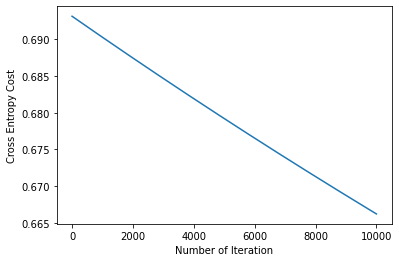

shape (13, 31)
Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31

[[11  3]
 [ 2 15]]


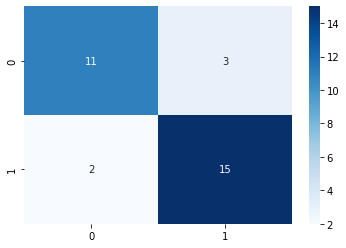

In [8]:

def initialize(dimension):
    weight = np.full((dimension,1),0)
    bias = 0.0
    return weight,bias

def sigmoid(z):
    y_hyp = 1/(1+ np.exp(-z))
    return y_hyp

def gradientCalculation(weight,bias,x_train,y_train):
    y_hyp = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_hyp) + (1-y_train)*np.log(1-y_hyp))
    m = x_train.shape[1]
    cost = (1/m) * np.sum(loss) 
    derWeight = (1/m) *np.dot(x_train,((y_hyp-y_train).T))
    derBias = (1/m)* np.sum(y_hyp-y_train)
    gradients = {"DerWeight" : derWeight, "DerBias" : derBias}
    return cost,gradients

def updateWeights(weight,bias,x_train,y_train,learningRate,iteration):
    costList = []
    index = []
    for i in range(iteration):
        cost,gradients = gradientCalculation(weight,bias,x_train,y_train)
        if(np.all(gradients["DerWeight"]<0.001) and gradients["DerBias"]<0.001):
          print("uday",i)
          break 
        weight = weight - learningRate * gradients["DerWeight"]
        bias = bias - learningRate * gradients["DerBias"]  
        costList.append(cost)
        index.append(i)
    parameters = {"weight": weight,"bias": bias}
    print(gradients["DerWeight"].shape)
    print("Iteration:",iteration)
    print("Cross Entropy Cost:",cost)
    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cross Entropy Cost")
    plt.show()
    return parameters, gradients

from pandas.core.frame import DataFrame
def predictTest(weight,bias,x_test):
    test=[]
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            test.append(0)
        else:
            test.append(1)
    return pd.DataFrame(test)

from sklearn.metrics import accuracy_score

def logistic_regression_training(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = updateWeights(weight,bias,x_train,y_train,learningRate,iteration)
    print("shape", x_test.shape)
    y_prediction = predictTest(parameters["weight"],parameters["bias"],x_test)
    print("Accuracy:",accuracy_score(y_test, y_prediction))
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_prediction))
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_prediction))
    sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True, cmap="Blues")
    return parameters
parameters = logistic_regression_training(x_train,y_train,x_test,y_test,0.00001,10000)

In [9]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 80.65%


In [10]:
y_pred = lr.predict(x_test.T)

In [11]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test.T, y_pred))

Accuracy: 0.8064516129032258


In [13]:
df_test = pd.read_csv("1644871288_9775174_cleveland-test.csv")
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7


In [14]:
# a = pd.get_dummies(df_test['cp'], prefix = "cp")
# b = pd.get_dummies(df_test['thal'], prefix = "thal")
# c = pd.get_dummies(df_test['slope'], prefix = "slope")
# frames = [df_test, a, b, c]
# df_test = pd.concat(frames, axis = 1)
# df_test = df_test.drop(columns = ['cp', 'thal', 'slope'])
# df_test

In [ ]:
# from sklearn import preprocessing

# df_test_array = df_test.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled_test = min_max_scaler.fit_transform(df_test_array)
# test_x_data = pd.DataFrame(x_scaled_test)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
test_x_data = scaler.fit_transform(df_test)

In [16]:
test_x_data.T.shape

(13, 145)

In [17]:
from pandas.core.frame import DataFrame
def predictTest(weight,bias,x_test):
    test=[]
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    #y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            test.append("-1")
        else:
            test.append("1")
    #print(y_prediction)
    return pd.DataFrame(test)

In [18]:
test_y_prediction = predictTest(parameters["weight"],parameters["bias"],test_x_data.T)

In [19]:
test_y_prediction

,0
0,-1
1,1
2,-1
3,1
4,1
...,...
140,-1
141,1
142,1
143,1


In [20]:
output=open('./assignOut.txt', 'w')

output.write(test_y_prediction.to_string(header=False, index=False))

output.close()